<a href="https://colab.research.google.com/github/grzegorzx/honey_production_prediction/blob/main/honey_production_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving honeyproduction.csv to honeyproduction.csv


In [5]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['honeyproduction.csv']))
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


Get the mean of totalprod per year.

In [11]:
prod_per_year = df.groupby('year').mean('totalprod')
prod_per_year.head()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
year,,,,,,
1998,60953.488372,69.953488,5.105093e+06,1.873605e+06,0.832558,3.397465e+06
1999,61325.581395,65.465116,4.706674e+06,1.823023e+06,0.804186,2.875744e+06
2000,60558.139535,67.581395,5.106000e+06,1.975721e+06,0.791395,3.059721e+06
2001,57772.727273,64.545455,4.221545e+06,1.471909e+06,0.911818,3.006409e+06
2002,58295.454545,66.795455,3.892386e+06,8.903864e+05,1.371364,5.165955e+06


Create X feature of the linear regression and reshape it to the right format.

In [18]:
X = prod_per_year.index
X = X.values.reshape(-1, 1)
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]])

Create y and reshape it to an array.

In [22]:
y = prod_per_year['totalprod']
y = y.values.reshape(-1, 1)
y

array([[5105093.02325581],
       [4706674.41860465],
       [5106000.        ],
       [4221545.45454545],
       [3892386.36363636],
       [4122090.90909091],
       [4456804.87804878],
       [4243146.34146341],
       [3761902.43902439],
       [3600512.19512195],
       [3974926.82926829],
       [3626700.        ],
       [4382350.        ],
       [3680025.        ],
       [3522675.        ]])

Plot of both values.

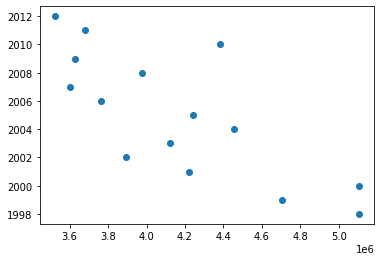

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y,X)
plt.show()

Create a linear regression model and fit the data.


In [30]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X,y)

regr.coef_, regr.intercept_

(array([[-88303.18915238]]), array([1.81208083e+08]))

Predict the y values and plot the line.

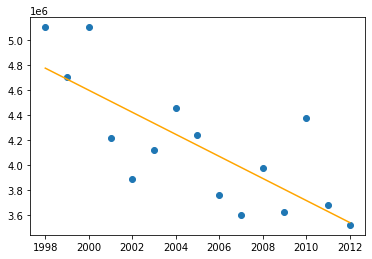

In [56]:
y_predict = regr.predict(X)

plt.scatter(X,y)
plt.plot(X,y_predict, color='orange')
plt.show()

With model ready, predict the prices of honey in 2050.

In [52]:
import numpy as np
X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1, 1)
X_future

array([[2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031],
       [2032],
       [2033],
       [2034],
       [2035],
       [2036],
       [2037],
       [2038],
       [2039],
       [2040],
       [2041],
       [2042],
       [2043],
       [2044],
       [2045],
       [2046],
       [2047],
       [2048],
       [2049]])

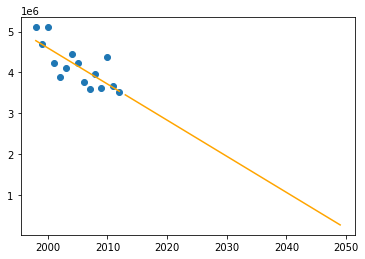

In [55]:
future_predict = regr.predict(X_future)

plt.scatter(X,y)
plt.plot(X,y_predict, color='orange')
plt.plot(X_future,future_predict, color='orange')
plt.show()

We can see significant decrease in honey production by the year 2050.